# Proyecto de Mitad de Curso

## Introducción

Muchas actividades se pueden modelar por medio de una gráfica: entidades que se relacionan entre
ellas. Por ejemplo, la Internet se puede modelar como una gráfica en donde cada computadora es
un nodo y sus conexiones como aristas que conectan a los nodos. Otro ejemplo lo demuestran las
rutas de vuelo entre aeropuertos: los nodos o vértices son los aeropuertos y las aristas
conectándolos son las rutas de vuelo; en este esquema, se deben preservar las relaciones
geográficas entre diferentes vértices. Cuando se trata de redes complicadas, es importante ilustrar
los atributos de la red de manera efectiva de tal forma que su interpretación sea rápida y que se
pueda reconocer la información importante sin confusión. En el caso de aeropuertos es importante
lograr que la audiencia capte rápidamente la red en su contexto geográfico.

## Descripción

Los datos para el proyecto provienen del Informe de Estadísticas de Carga y Pasajeros Aéreos Internacionales de EE.UU. Como parte del programa T-100, el USDOT recibe informes de tráfico de las aerolíneas estadounidenses e internacionales que operan desde y hacia los aeropuertos estadounidenses. Estos datos cubren los años 1990 a 2020 (US Air Traffic 1990-2020).
Hay dos conjuntos de datos disponibles:
- Pasajeros (International Report Passengers): datos sobre el número total de pasajeros para cada mes y año entre un par de aeropuertos, según los servicios de una aerolínea en particular. Los datos de carga y pasajeros aéreos internacionales de EE. UU. son confidenciales durante un período de 6 meses, después del cual se pueden divulgar. Como resultado, los informes trimestrales y los archivos de datos sin procesar del año hasta la fecha/año calendario disponibles aquí siempre tendrán un retraso de dos trimestres.
- Salidas (International Report Departures): datos sobre todos los vuelos entre puertas de enlace de EE. UU. y fuera de EE. UU., independientemente del origen y el destino. Cada observación brinda información sobre una aerolínea específica para un par de aeropuertos, uno en los EE. UU. y el otro fuera. Existen tres columnas principales registran el número de vuelos a) Programados, b) Chárter y c) Totales.

In [ ]:
import pandas as pd

In [ ]:
pasajeros = pd.read_csv('/work/US_Air_Traffic_1990-2020/International_Report_Passengers.csv')

pasajeros.head(5)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [ ]:
salidas = pd.read_csv('/work/US_Air_Traffic_1990-2020/International_Report_Departures.csv')

salidas.head(5)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


## Objetivo
El proyecto consiste en realizar una visualización de los datos para lo cual se deben presentar
varios métodos de visualización, pero es indispensable que uno de ellos sea que visualice redes
con posicionamiento geoespacial. Hay muchos datos en la base de datos y por ello, quizás, se
deben filtrar o limpiar además de que puede ser útil buscar alguna correlación para poder hacer
una visualización más informativa.

### Diccionario de Datos:


**'data_dte'**: Fecha.

**'Year'**: Año en que se registraron los datos.

**'Month'**: Mes en que se registraron los datos.

**'usg_apt_id'**: US Gateway Airport ID: asignado por el DOT de EE. UU. para identificar un aeropuerto.

**'usg_apt'**: Código de aeropuerto de entrada de EE. UU.: generalmente asignado por IATA, pero en ausencia de la designación de IATA, puede mostrar el código asignado por la FAA.

**'usg_wac'**: Código de área mundial de puerta de enlace de EE. UU.: asignado por el DOT de EE. UU. para representar un territorio geográfico.

**'fg_apt_id'**: ID de aeropuerto de puerta de enlace extranjera: asignado por el DOT de EE. UU. para identificar un aeropuerto.

**'fg_apt'**: Código de aeropuerto de puerta de enlace extranjera: generalmente asignado por la IATA, pero en ausencia de la designación de la IATA, puede mostrar el código asignado por la FAA.

**'fg_wac'**: Código de área mundial de puerta de enlace extranjera: asignado por el DOT de EE. UU. para representar un territorio geográfico.

**'airlineid'**: Identificación de la aerolínea: asignada por el DOT de EE. UU. para identificar una compañía aérea.

**'carrier'**: Código de compañía aérea asignado por IATA. Si la aerolínea no tiene un código IATA, se puede usar un código asignado por la ICAO o la FAA.

**'carriergroup'**: Código de grupo de transportista: 1 indica transportistas aéreos nacionales de EE. UU., 0 indica transportistas aéreos extranjeros.

**'type'**: El tipo de las métricas.

**'Scheduled'**: Métrica volada por operaciones de servicio programadas.

**'Charter'**: Métrica volada por operaciones chárter.

**'Total'**: Total Métrica volada por servicio programado y operaciones chárter.


### Datos Adicionales

Para poder un grafo sobre un mapa, es necesario tener las coordenadas geográficas, datos con los que no cuenta nuestra base de datos, así que se requiere buscar en fuentes externas:

https://www.partow.net/miscellaneous/airportdatabase/

La base de datos mundial de aeropuertos (GADB) es una base de datos descargable GRATUITA de
9300 aeropuertos grandes y pequeños de todo el mundo. la base de datos es
presentado en un formato simple delimitado por tokens.

#### Diccionario de la Base de Datos de Airopuertos:
**01**: Código OACI

**02**: código IATA

**03**: Nombre del aeropuerto

**04**: Ciudad/Pueblo

**05**: País

**06**: Grados de latitud

**07**: Minutos de latitud

**08**: Segundos de latitud

**09**: Latitud Dirección

**10**: grados de longitud

**11**: Longitud Minutos

**12**: segundos de longitud

**13**: Longitud Dirección

**14**: Altitud

**16**: Grados decimales de latitud

**17**: Longitud Grados decimales


In [ ]:
airport = pd.read_csv("/work/Aeropuertos/GlobalAirportDatabase.txt", delimiter=":", header = None)
airport.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726


----

In [ ]:
!pip install basemap

     |████████████████████████████████| 862 kB 28.8 MB/s 
     |████████████████████████████████| 219 kB 58.4 MB/s 
     |████████████████████████████████| 30.5 MB 64.4 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=853ad74e64724d2cd1926076753b39a1a98b2f81eda0c6a7f5efa2053f5c7bd5
  Stored in directory: /root/.cache/pip/wheels/6a/73/a7/3dc684169ab99e26d1e9e25f2a939ea1886209f1b4087b4131
Successfully built pyshp
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
'''
Prueba para la base de datos de Aeropuertos y la descarga de los mapas:
'''
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

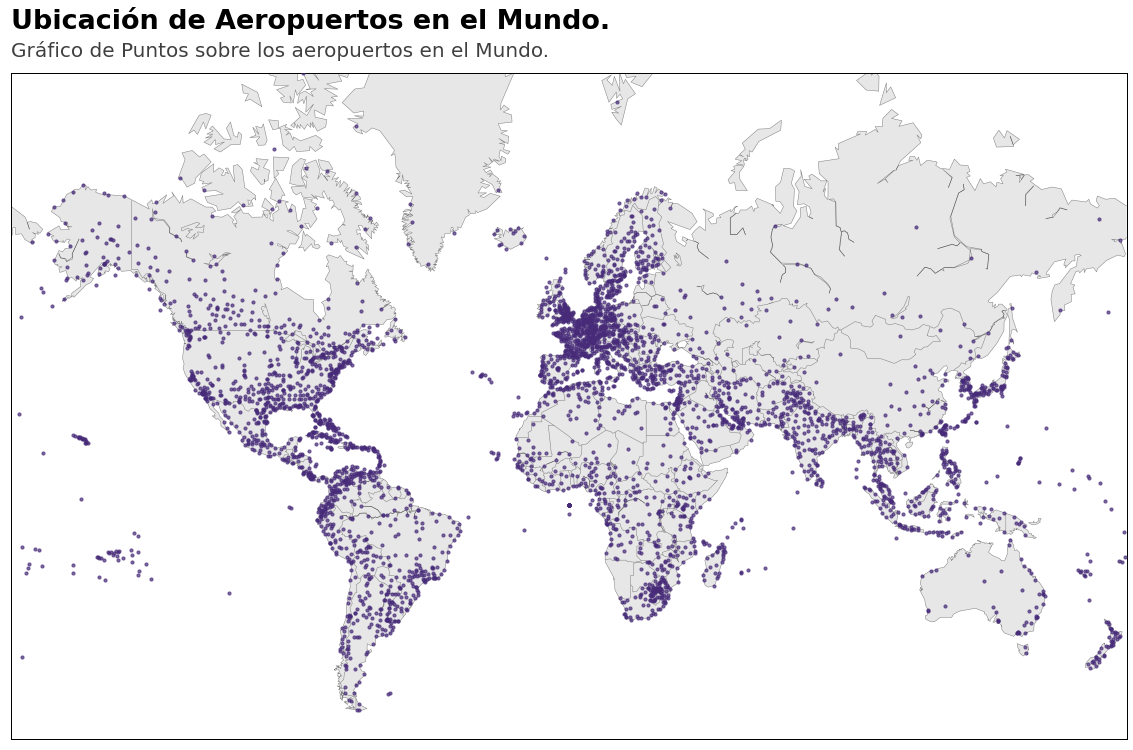

In [ ]:
fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon=-180, llcrnrlat=-60,
    urcrnrlon=180,urcrnrlat=80   
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

# Add a point per position

x, y = m(airport[15], airport[14])

m.scatter(
    x, 
    y, 
    s=10, 
    alpha=0.7, 
    c='#472B79',
    cmap="Set1", 
    zorder=10
)


plt.text(x=-8*(1), y=25.5*(1000000), s='Ubicación de Aeropuertos en el Mundo.', fontsize=27, weight='bold')

plt.text(x=-5*(1), y=24.5*(1000000), s='Gráfico de Puntos sobre los aeropuertos en el Mundo.', fontsize=20, alpha=0.75)

plt.savefig("/work/Graph/Aero_Mundo.pdf", dpi = 300, bbox_inches='tight')

In [ ]:
'''
Vamos a generar un join entre los data frames, con el fin de obtener las coordenadas de los aeropuertos
en nuestrs datos:
'''
import numpy as np

# Ajustemos el valor de la llave sobre la que vamos a hacer el join:
# fg_apt y 2

air = airport[[1, 4, 14, 15]]
air.columns = ['fg_apt', 'country', 'lat', 'long']

air.loc[6990] = ['EZE', 'ARGENTINA', -34.822222, -58.535833]
air.loc[7978] = ['GEO', 'GUYANA', 6.498333, -58.253889]
air.loc[6] = ['RAB', 'PAPUA NEW GUINEA', -4.340278, 152.379444]
air.loc[5178] = ['GDT', 'TURKS & CAICOS I.', 21.444444, -71.142222]
air.loc[5242] = ['FRS','GUATEMALA', 16.908983, -89.853228]
air.loc[6735] = ['KIJ','JAPAN', 37.955833, 139.111667]
air.loc[8166] = ['RIX', 'RUSSIA', 56.920833, 23.970833]

# Agregamos airopuertos faltantes

air = air.append({'fg_apt': 'ICN', 'country': 'South Korea' ,'lat': 37.4625, 'long': 126.439167}, ignore_index=True)
air = air.append({'fg_apt': 'KIX', 'country': 'JAPAN' ,'lat': 34.434167, 'long': 135.232778}, ignore_index=True)
air = air.append({'fg_apt': 'PVG', 'country': 'CHINA' ,'lat': 31.143333, 'long': 121.805278}, ignore_index=True)
air = air.append({'fg_apt': 'BDA', 'country': 'ENGLAND' ,'lat':32.364167, 'long':  -64.678611}, ignore_index=True)
air = air.append({'fg_apt': 'SEL', 'country': 'South Korea' ,'lat': 37.566535, 'long': 126.977969}, ignore_index=True)


# Borramos los repetidos
air = air.drop([8046, 1127, 6800, 5578, 5608, 5703, 6013, 5449, 3074])

# Hacemos un join

airport_completo = salidas.join(air.set_index('fg_apt'), on='fg_apt')

# Ahora vamos a buscar las coordenadas para los aeropuertos de estados Unidos 

air_usa = airport[[1, 14, 15]]
air_usa.columns = ['usg_apt','lat_usa', 'long_usa']

# Aunque nuestros join es muy bueno hay unos cuantos aeropuertos que no estaban agregados en la base de datos:
# 3692, SFB, 28.7771781,-81.2349139
# 3381, ABQ, 35.039333, -106.610778
# 3671, BQK, 31.2590347,-81.4663158
# 8023, VQS, 18.1348111,-65.4936167
# 3664, ABY, 31.534664528 -84.18999924
# 3548, HAR, 41.978611, -87.904722
# 8024, CPX, 32.548333, -116.974444
# 5969, TKF, 39.32, -120.139444

air_usa.loc[3692] = ['SFB' ,28.7771781, -81.2349139]
air_usa.loc[3381] = ['ABQ' , 35.039333, -106.610778]
air_usa.loc[3671] = ['BQK', 31.2590347,-81.4663158]
air_usa.loc[8023] = ['VQS', 18.1348111,-65.4936167]
air_usa.loc[3664] = ['ABY', 31.534664528, -84.18999924]
air_usa.loc[3548] = ['HAR', 41.978611, -87.904722]
air_usa.loc[8024] = ['CPX', 32.548333, -116.974444]
air_usa.loc[5969] = ['TKF', 39.32, -120.139444]

# Agregamos aeropuertos faltantes

air_usa = air_usa.append({'usg_apt': 'SDF', 'lat_usa': 38.174167, 'long_usa': 85.736389}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'HSV', 'lat_usa': 34.637222, 'long_usa': -86.775}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'TOL', 'lat_usa': 41.586806, 'long_usa': -83.807833}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'LKE', 'lat_usa': 47.628987, 'long_usa': -122.338738}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'PTK', 'lat_usa': 42.6656362, 'long_usa': -83.4205056}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'KEH', 'lat_usa': 56.906944, 'long_usa': -124.966111}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'RFD', 'lat_usa': 42.195278, 'long_usa': -89.097222}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'AZA', 'lat_usa': 33.307778, 'long_usa': -111.655556}, ignore_index=True)
air_usa = air_usa.append({'usg_apt': 'GSP', 'lat_usa': 34.895556, 'long_usa': -82.218889}, ignore_index=True)
 
# Hacemos un join

airport_completo = airport_completo.join(air_usa.set_index('usg_apt'), on='usg_apt')



/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [ ]:
# Eliminemos los valores faltantes que no pudieron ser completados:

airport_completo =  airport_completo.dropna()

In [ ]:
airport_completo

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,carriergroup,type,Scheduled,Charter,Total,country,lat,long,lat_usa,long_usa
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,...,1,Departures,0,10,10,MARSHALL ISLANDS,7.065,171.272,13.484,144.797
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,...,1,Departures,0,15,15,JAPAN,35.748,139.348,61.174,-149.996
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,...,1,Departures,0,1,1,ICELAND,63.985,-22.606,42.364,-71.005
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,...,1,Departures,0,1,1,CANADA,43.677,-79.631,32.847,-96.852
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,...,0,Departures,0,20,20,CUBA,21.420,-77.847,25.793,-80.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,...,1,Departures,1422,0,1422,BAHAMAS,25.039,-77.466,25.793,-80.291
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,...,0,Departures,1439,0,1439,PANAMA,9.071,-79.383,25.793,-80.291
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,...,1,Departures,1441,0,1441,BAHAMAS,25.039,-77.466,25.793,-80.291
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,...,0,Departures,1461,0,1461,MEXICO,17.997,-92.817,29.980,-95.340


In [ ]:
completo_pasajeros = pasajeros.join(air.set_index('fg_apt'), on='fg_apt')
completo_pasajeros = completo_pasajeros.join(air_usa.set_index('usg_apt'), on='usg_apt')
completo_pasajeros =  completo_pasajeros.dropna()
completo_pasajeros

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,carriergroup,type,Scheduled,Charter,Total,country,lat,long,lat_usa,long_usa
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,...,0,Passengers,0,315,315,MEXICO,21.036,-86.877,35.877,-78.787
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,...,0,Passengers,0,683,683,CANADA,44.881,-63.509,28.429,-81.316
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,...,1,Passengers,0,1010,1010,ARUBA,12.501,-70.015,42.212,-83.353
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,...,1,Passengers,0,508,508,MEXICO,17.601,-101.460,44.880,-93.217
5,03/01/2007,2007,3,14843,SJU,3,15084,SXM,259,20421,...,1,Passengers,0,35,35,ANTILLES,18.041,-63.109,18.439,-66.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680980,10/01/2015,2015,10,12478,JFK,22,12972,LHR,493,19540,...,0,Passengers,130217,0,130217,ENGALND,51.477,-0.461,40.640,-73.779
680981,09/01/2014,2014,9,12478,JFK,22,12972,LHR,493,19540,...,0,Passengers,132052,0,132052,ENGALND,51.477,-0.461,40.640,-73.779
680982,10/01/2014,2014,10,12478,JFK,22,12972,LHR,493,19540,...,0,Passengers,132822,0,132822,ENGALND,51.477,-0.461,40.640,-73.779
680983,08/01/2014,2014,8,12478,JFK,22,12972,LHR,493,19540,...,0,Passengers,134263,0,134263,ENGALND,51.477,-0.461,40.640,-73.779


In [ ]:
# Cambio de nombre de Páises:

# ENGLAND y ENGALND por UNITED KINGDOM

airport_completo.replace('ENGLAND', 'UNITED KINGDOM', inplace=True)
airport_completo.replace('ENGALND', 'UNITED KINGDOM', inplace=True)

# UK por UNITED KINGDOM

airport_completo.replace('UK', 'UNITED KINGDOM', inplace=True)

# Republic of Korea

airport_completo.replace('South Korea', 'KOR', inplace=True)

#### Gráfica:

In [ ]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 72.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import plotly.graph_objects as go

conteo = airport_completo.groupby('usg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['usg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:100]
conteo = conteo.join(air_usa.set_index('usg_apt'), on='usg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 3000

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = conteo['long_usa'],
        lat = conteo['lat_usa'],
        text = conteo['usg_apt'],
        marker = dict(
            size = conteo['Total']/scale,
            opacity = 0.8,
            autocolorscale = False,
            symbol = 'circle',
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            cmin = 0,
            color = conteo['Total'],
            cmax = conteo['Total'].max(),
            colorbar_title= ""
        )))
        #name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        #title_text = 'Aeropuertos con Mayor Catidad de Vuelos',
        #showlegend = True,
        #margin=dict(l=20, r=20, t=30, b=20),
        geo = dict(
            scope = 'usa',
            landcolor = '#E7E7E7',
            bgcolor = '#FFFFFF',
            lakecolor = '#FFFFFF',
            countrycolor = '#CACACA',
            coastlinecolor = '#CACACA'
        )
    )

fig.write_image("/work/Graph/A_USA_vuelos.pdf")

fig.show()

In [ ]:
conteo = airport_completo.groupby('fg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['fg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:200]
conteo = conteo.join(air.set_index('fg_apt'), on='fg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 8000

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        lon = conteo['long'],
        lat = conteo['lat'],
        text = conteo['fg_apt'],
        marker = dict(
            size = conteo['Total']/scale,
            opacity = 0.7,
            autocolorscale = False,
            symbol = 'circle',
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            cmin = 0,
            color = conteo['Total'],
            cmax = conteo['Total'].max(),
            colorbar_title= ""
        )))
        #name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        title_text = 'Ubicación aeropuertos extranjeros con más vuelos',
        #showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = '#5A6163',
            bgcolor = '#E5E5E5',
            lakecolor = '#E5E5E5',
            countrycolor = '#E5E5E5',
            coastlinecolor = '#E5E5E5'
        )
    )

fig.show()

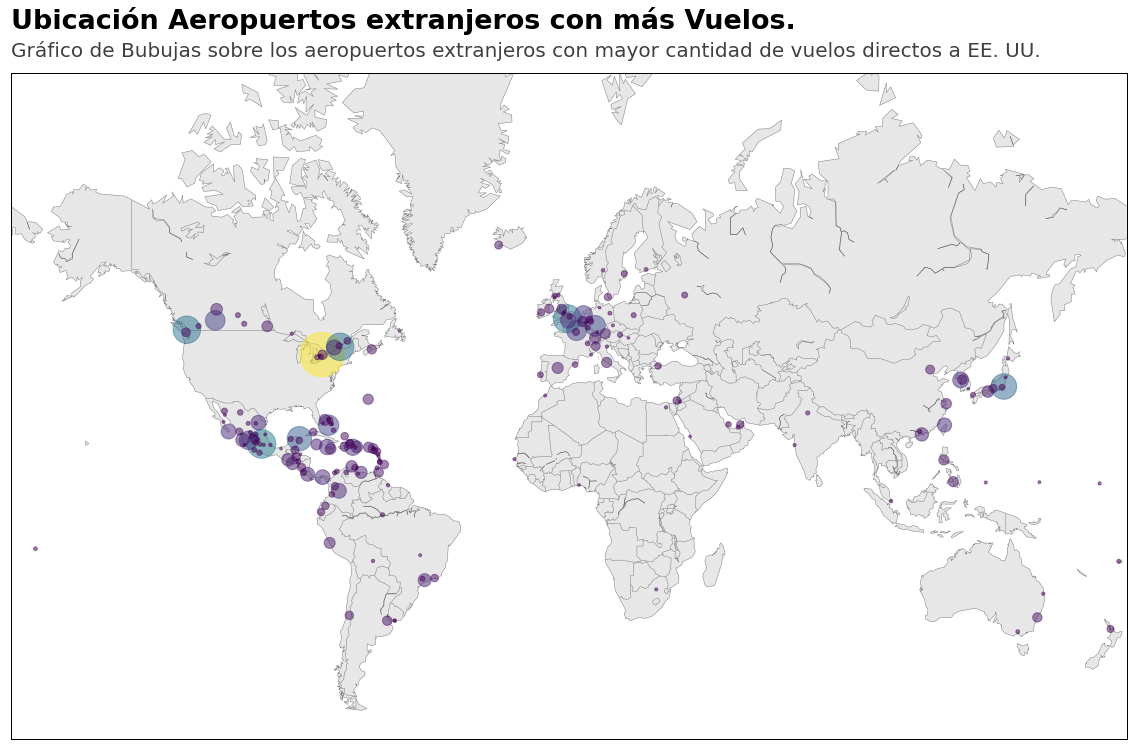

In [ ]:
conteo = airport_completo.groupby('fg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['fg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:200]
conteo = conteo.join(air.set_index('fg_apt'), on='fg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 8000

fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon=-180, llcrnrlat=-60,
    urcrnrlon=180,urcrnrlat=80   
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

# Add a point per position

x, y = m(conteo['long'], conteo['lat'])

m.scatter(
    x, 
    y, 
    s= conteo['Total']/2000, 
    alpha=0.5, 
    c=conteo['Total'],
    cmap="viridis", 
    zorder=10
)

plt.text(x=-8*(1), y=25.5*(1000000), s='Ubicación Aeropuertos extranjeros con más Vuelos.', fontsize=27, weight='bold')

plt.text(x=-5*(1), y=24.5*(1000000), s='Gráfico de Bubujas sobre los aeropuertos extranjeros con mayor cantidad de vuelos directos a EE. UU.', fontsize=20, alpha=0.75)

plt.savefig("/work/Graph/M_vuelosext.pdf", dpi = 300, bbox_inches='tight')

In [ ]:
conteo = completo_pasajeros.groupby('usg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['usg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:100]
conteo = conteo.join(air_usa.set_index('usg_apt'), on='usg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 500000

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = conteo['long_usa'],
        lat = conteo['lat_usa'],
        text = conteo['usg_apt'],
        marker = dict(
            size = conteo['Total']/scale,
            opacity = 0.8,
            autocolorscale = False,
            symbol = 'circle',
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            cmin = 0,
            color = conteo['Total'],
            cmax = conteo['Total'].max(),
            colorbar_title= ""
        )))
        #name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        title_text = '<b>Aeropuertos con mayores pasajeros<b>',
        #showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = '#E7E7E7',
            bgcolor = '#FFFFFF',
            lakecolor = '#FFFFFF',
            countrycolor = '#CACACA',
            coastlinecolor = '#CACACA'
        )
    )

fig.show()
fig.write_image("/work/Graph/A_USA_pasajeros.pdf")

In [ ]:
conteo = completo_pasajeros.groupby('fg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['fg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:200]
conteo = conteo.join(air.set_index('fg_apt'), on='fg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 500000

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        lon = conteo['long'],
        lat = conteo['lat'],
        text = conteo['fg_apt'],
        marker = dict(
            size = conteo['Total']/scale,
            opacity = 0.7,
            autocolorscale = False,
            symbol = 'circle',
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            cmin = 0,
            color = conteo['Total'],
            cmax = conteo['Total'].max(),
            colorbar_title= ""
        )))
        #name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        title_text = 'Ubicación aeropuertos extranjeros con más pasajeros',
        #showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = '#E7E7E7',
            bgcolor = '#FFFFFF',
            lakecolor = '#FFFFFF',
            countrycolor = '#CACACA',
            coastlinecolor = '#CACACA'
        )
    )

fig.show()

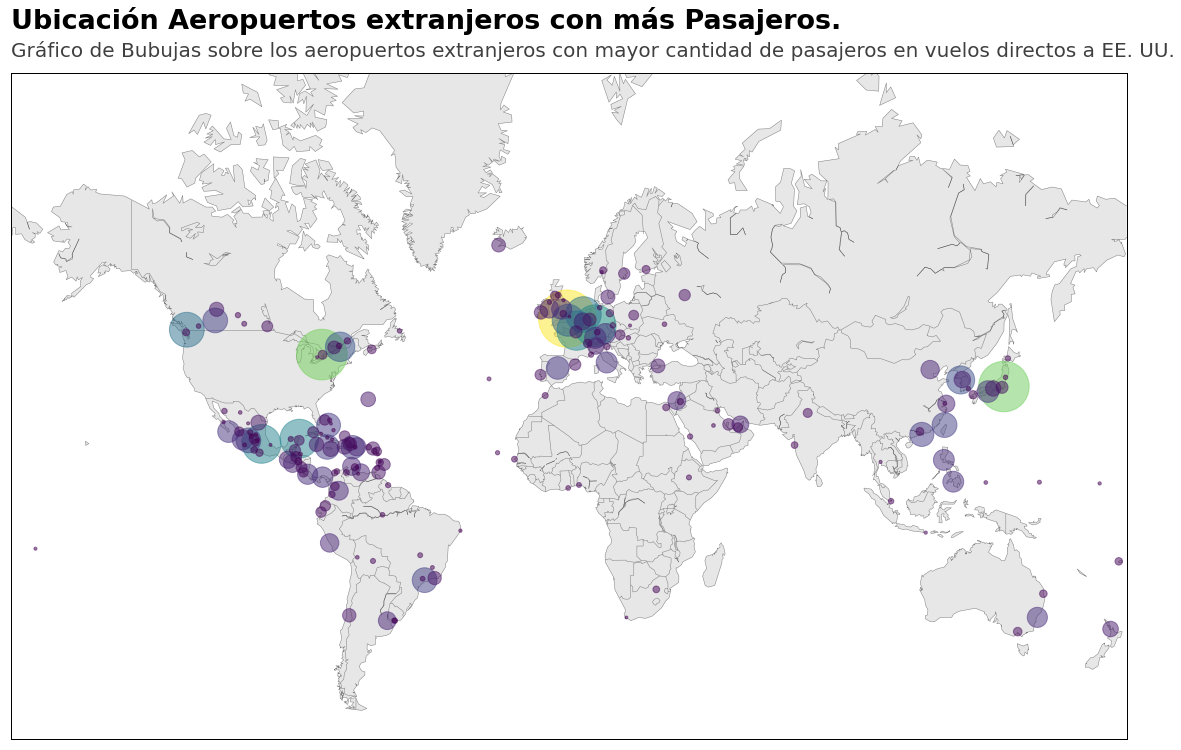

In [ ]:
conteo = completo_pasajeros.groupby('fg_apt')['Total'].sum().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['fg_apt','Total']
conteo = conteo.sort_values('Total', ascending=False)[:200]
conteo = conteo.join(air.set_index('fg_apt'), on='fg_apt')


limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey", 'blue', 'green']
cities = []
scale = 500000

fig = plt.figure(figsize=(20, 20))

# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon=-180, llcrnrlat=-60,
    urcrnrlon=180,urcrnrlat=80   
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

# Add a point per position

x, y = m(conteo['long'], conteo['lat'])

m.scatter(
    x, 
    y, 
    s= conteo['Total']/100000, 
    alpha=0.5, 
    c=conteo['Total'],
    cmap="viridis", 
    zorder=10
)

plt.text(x=-8*(1), y=25.5*(1000000), s='Ubicación Aeropuertos extranjeros con más Pasajeros.', fontsize=27, weight='bold')

plt.text(x=-5*(1), y=24.5*(1000000), s='Gráfico de Bubujas sobre los aeropuertos extranjeros con mayor cantidad de pasajeros en vuelos directos a EE. UU.', fontsize=20, alpha=0.75)

plt.savefig("/work/Graph/M_pasajerosext.pdf", dpi = 300, bbox_inches='tight')

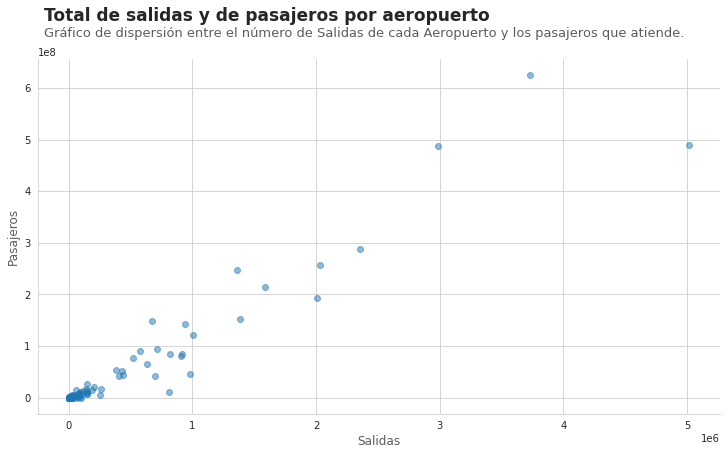

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

#matplotlib.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.color_palette("Set2")
#sns.set()
#%config InlineBackend.figure_format = 'retina'

conteo_salidas = airport_completo.groupby('usg_apt')['Total'].sum().to_frame()
conteo_salidas = conteo_salidas.reset_index()
conteo_salidas.columns = ['usg_apt','Total_Salidas']

conteo_pasajeros = completo_pasajeros.groupby('usg_apt')['Total'].sum().to_frame()
conteo_pasajeros = conteo_pasajeros.reset_index()
conteo_pasajeros.columns = ['usg_apt','Total_Pasajeros']

conteo = conteo_salidas.join(conteo_pasajeros.set_index('usg_apt'), on='usg_apt')
conteo = conteo.dropna()

sns.lmplot(x="Total_Salidas", y="Total_Pasajeros", data=conteo, fit_reg=False, scatter_kws={'alpha':0.5})
plt.xlabel('Salidas', fontsize=12, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=12, alpha=0.75)

plt.text(x=-0.2*(1000000), y=7.3*(100000000), s='Total de salidas y de pasajeros por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.2*(1000000), y=7*(100000000), s='Gráfico de dispersión entre el número de Salidas de cada Aeropuerto y los pasajeros que atiende.', fontsize=13, alpha=0.75)

figure = plt.gcf()

figure.set_size_inches(11, 6)

plt.savefig("/work/Graph/Ts_N.pdf", dpi = 300, bbox_inches='tight')

plt.show()

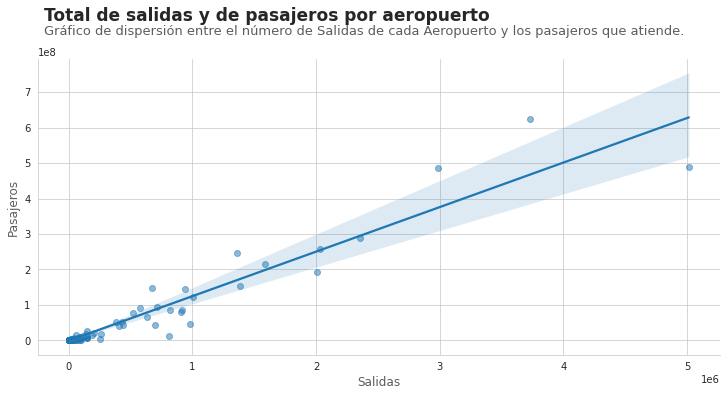

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

#matplotlib.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.color_palette("husl", 8)
#sns.set()
#%config InlineBackend.figure_format = 'retina'

conteo_salidas = airport_completo.groupby('usg_apt')['Total'].sum().to_frame()
conteo_salidas = conteo_salidas.reset_index()
conteo_salidas.columns = ['usg_apt','Total_Salidas']

conteo_pasajeros = completo_pasajeros.groupby('usg_apt')['Total'].sum().to_frame()
conteo_pasajeros = conteo_pasajeros.reset_index()
conteo_pasajeros.columns = ['usg_apt','Total_Pasajeros']

conteo = conteo_salidas.join(conteo_pasajeros.set_index('usg_apt'), on='usg_apt')
conteo = conteo.dropna()

sns.lmplot(x="Total_Salidas", y="Total_Pasajeros", data=conteo, fit_reg=True, scatter_kws={'alpha':0.5})
plt.xlabel('Salidas', fontsize=12, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=12, alpha=0.75)

plt.text(x=-0.2*(1000000), y=9*(100000000), s='Total de salidas y de pasajeros por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.2*(1000000), y=8.6*(100000000), s='Gráfico de dispersión entre el número de Salidas de cada Aeropuerto y los pasajeros que atiende.', fontsize=13, alpha=0.75)

figure = plt.gcf()

figure.set_size_inches(11, 5)

plt.savefig("/work/Graph/Ts_N_L.pdf", dpi = 300, bbox_inches='tight')

plt.show()

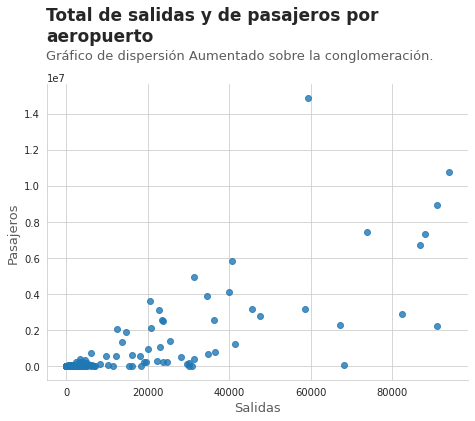

In [ ]:
conteo_1 = conteo[conteo['Total_Salidas'] < 100000]
sns.lmplot(x="Total_Salidas", y="Total_Pasajeros", data=conteo_1, fit_reg=False)
plt.xlabel('Salidas', fontsize=13, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=13, alpha=0.75)
plt.text(x=-0.05*(100000), y=1.8*(10000000), s='Total de salidas y de pasajeros por \naeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.05*(100000), y=1.7*(10000000), s='Gráfico de dispersión Aumentado sobre la conglomeración.', fontsize=13, alpha=0.75)

figure = plt.gcf()

figure.set_size_inches(7, 5)

plt.savefig("/work/Graph/Ts_N_Z1.pdf", dpi = 300, bbox_inches='tight')

plt.show()

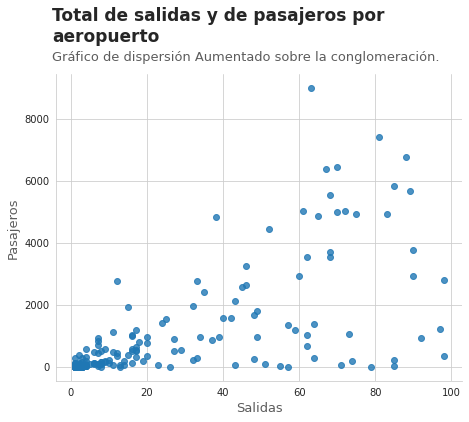

In [ ]:
conteo_2 = conteo[conteo['Total_Salidas'] < 100]
sns.lmplot(x="Total_Salidas", y="Total_Pasajeros", data=conteo_2, fit_reg=False)
plt.xlabel('Salidas', fontsize=13, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=13, alpha=0.75)
plt.text(x=-0.005*(1000), y=1.05*(10000), s='Total de salidas y de pasajeros por \naeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.005*(1000), y=0.99*(10000), s='Gráfico de dispersión Aumentado sobre la conglomeración.', fontsize=13, alpha=0.75)


figure = plt.gcf()

figure.set_size_inches(7, 5)

plt.savefig("/work/Graph/Ts_N_Z2.pdf", dpi = 300, bbox_inches='tight')
plt.show()

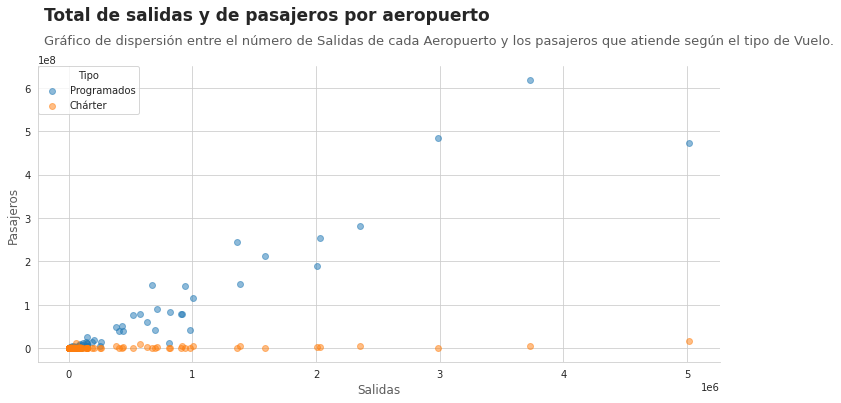

In [ ]:
conteo_salidas = airport_completo.groupby('usg_apt')['Total'].sum().to_frame()
conteo_salidas = conteo_salidas.reset_index()
conteo_salidas.columns = ['usg_apt','Total_Salidas']

conteo_pasajeros_prog = completo_pasajeros.groupby('usg_apt')['Scheduled'].sum().to_frame()
conteo_pasajeros_prog = conteo_pasajeros_prog.reset_index()
conteo_pasajeros_prog.columns = ['usg_apt','Total_Pasajeros_Prog']
conteo_pasajeros_prog['Tipo'] = ['Programados']*len(conteo_pasajeros_prog)

conteo_pasajeros_char = completo_pasajeros.groupby('usg_apt')['Charter'].sum().to_frame()
conteo_pasajeros_char = conteo_pasajeros_char.reset_index()
conteo_pasajeros_char.columns = ['usg_apt','Total_Pasajeros_Prog']
conteo_pasajeros_char['Tipo'] = ['Chárter']*len(conteo_pasajeros_char)

conteo = pd.concat([conteo_pasajeros_prog, conteo_pasajeros_char])
conteo = conteo.join(conteo_salidas.set_index('usg_apt'), on='usg_apt')
#conteo = conteo.dropna()

sns.lmplot(x="Total_Salidas", y="Total_Pasajeros_Prog", hue='Tipo', data=conteo, fit_reg=False, scatter_kws={'alpha':0.5}, legend = False)

plt.xlabel('Salidas', fontsize=12, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=12, alpha=0.75)

plt.text(x=-0.2*(1000000), y=7.55*(100000000), s='Total de salidas y de pasajeros por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.2*(1000000), y=7*(100000000), s='Gráfico de dispersión entre el número de Salidas de cada Aeropuerto y los pasajeros que atiende según el tipo de Vuelo.', fontsize=13, alpha=0.75)

plt.legend(loc='upper left', borderaxespad=0, title='Tipo')

figure = plt.gcf()

figure.set_size_inches(11, 5)

plt.savefig("/work/Graph/Ts_N_C_1.pdf", dpi = 300, bbox_inches='tight')

plt.show()

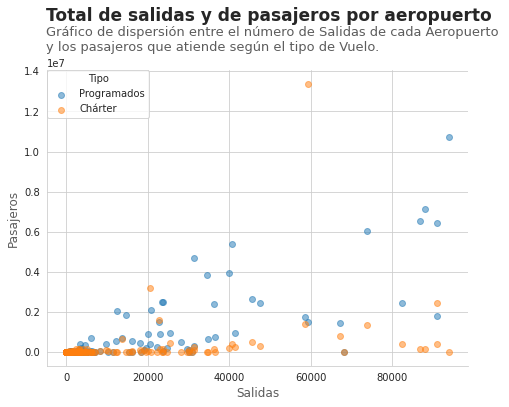

In [ ]:
conteo_1 = conteo[conteo['Total_Salidas'] < 100000]
sns.lmplot(x="Total_Salidas", y="Total_Pasajeros_Prog", hue='Tipo', data=conteo_1, fit_reg=False,  scatter_kws={'alpha':0.5}, legend = False)
plt.xlabel('Salidas', fontsize=12, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=12, alpha=0.75)

plt.text(x=-0.05*(100000), y=1.65*(10000000), s='Total de salidas y de pasajeros por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.05*(100000), y=1.5*(10000000), s='Gráfico de dispersión entre el número de Salidas de cada Aeropuerto \ny los pasajeros que atiende según el tipo de Vuelo.', fontsize=13, alpha=0.75)
plt.legend(loc='upper left', borderaxespad=0, title='Tipo')

figure = plt.gcf()

figure.set_size_inches(7, 5)

plt.savefig("/work/Graph/Ts_N_C_2.pdf", dpi = 300, bbox_inches='tight')
plt.show()

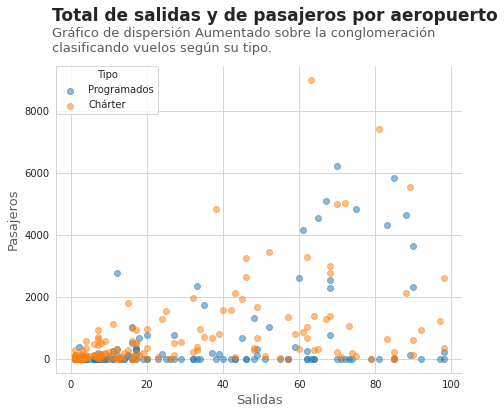

In [ ]:
conteo_2 = conteo[conteo['Total_Salidas'] < 100]
sns.lmplot(x="Total_Salidas", y="Total_Pasajeros_Prog", hue='Tipo', data=conteo_2, fit_reg=False,  scatter_kws={'alpha':0.5}, legend = False)
plt.xlabel('Salidas', fontsize=13, alpha=0.75)
plt.ylabel('Pasajeros', fontsize=13, alpha=0.75)
plt.text(x=-0.005*(1000), y=1.09*(10000), s='Total de salidas y de pasajeros por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-0.005*(1000), y=0.99*(10000), s='Gráfico de dispersión Aumentado sobre la conglomeración \nclasificando vuelos según su tipo.', fontsize=13, alpha=0.75)

plt.legend(loc='upper left', borderaxespad=0, title='Tipo')

figure = plt.gcf()

figure.set_size_inches(7, 5)


plt.savefig("/work/Graph/Ts_N_C_3.pdf", dpi = 300, bbox_inches='tight')
plt.show()

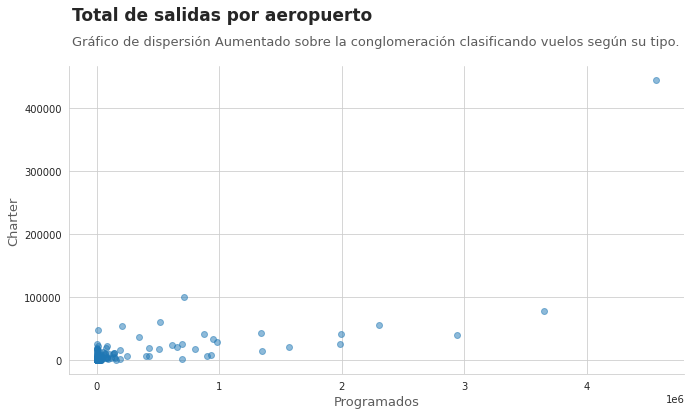

In [ ]:
conteo = airport_completo.groupby('usg_apt')[['Scheduled', 'Charter']].sum()

sns.lmplot(x="Scheduled", y="Charter", data=conteo, fit_reg=False,  scatter_kws={'alpha':0.5})

plt.xlabel('Programados', fontsize=13, alpha=0.75)
plt.ylabel('Charter', fontsize=13, alpha=0.75)
plt.text(x=-2*(100000), y=5.4*(100000), s='Total de salidas por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-2*(100000), y=5*(100000), s='Gráfico de dispersión Aumentado sobre la conglomeración clasificando vuelos según su tipo.', fontsize=13, alpha=0.75)


figure = plt.gcf()

figure.set_size_inches(11, 5)


plt.savefig("/work/Graph/Ts_N_C_4.pdf", dpi = 300, bbox_inches='tight')

plt.show()

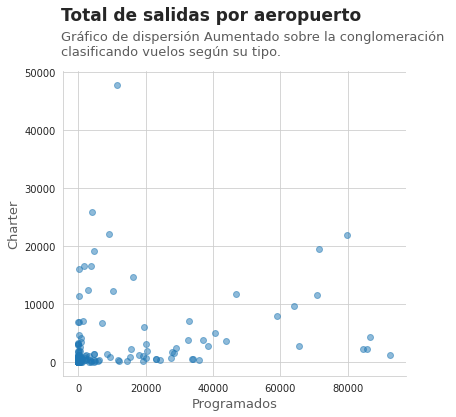

In [ ]:
conteo_1 = conteo[conteo['Scheduled'] < 100000]
sns.lmplot(x="Scheduled", y="Charter", data=conteo_1, fit_reg=False,  scatter_kws={'alpha':0.5})
plt.xlabel('Programados', fontsize=13, alpha=0.75)
plt.ylabel('Charter', fontsize=13, alpha=0.75)
plt.text(x=-5*(1000), y=5.9*(10000), s='Total de salidas por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-5*(1000), y=5.3*(10000), s='Gráfico de dispersión Aumentado sobre la conglomeración \nclasificando vuelos según su tipo.', fontsize=13, alpha=0.75)


figure = plt.gcf()

figure.set_size_inches(6, 5)


plt.savefig("/work/Graph/Ts_N_C_5.pdf", dpi = 300, bbox_inches='tight')

plt.show()

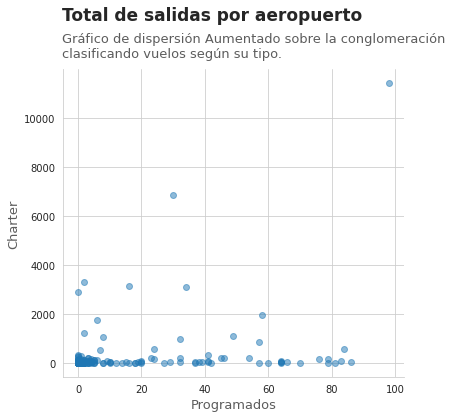

In [ ]:
conteo_2 = conteo[conteo['Scheduled'] < 100]
sns.lmplot(x="Scheduled", y="Charter", data=conteo_2, fit_reg=False, scatter_kws={'alpha':0.5})
plt.xlabel('Programados', fontsize=13, alpha=0.75)
plt.ylabel('Charter', fontsize=13, alpha=0.75)
plt.text(x=-5*(1), y=1.4*(10000), s='Total de salidas por aeropuerto', fontsize=17, weight='bold')
plt.text(x=-5*(1), y=1.25*(10000), s='Gráfico de dispersión Aumentado sobre la conglomeración \nclasificando vuelos según su tipo.', fontsize=13, alpha=0.75)


figure = plt.gcf()

figure.set_size_inches(6, 5)


plt.savefig("/work/Graph/Ts_N_C_6.pdf", dpi = 300, bbox_inches='tight')

plt.show()

<Figure size 1440x216 with 0 Axes>

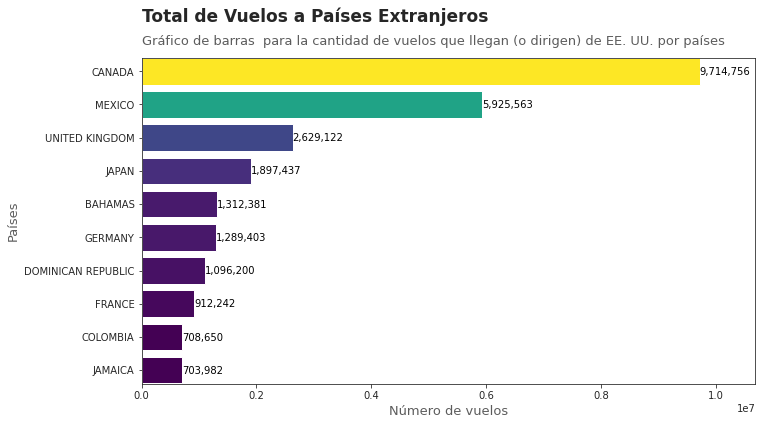

In [ ]:
import matplotlib as mp
import matplotlib.cm as cm

sns.set_style("ticks")
sns.despine()

conteo_c = airport_completo.groupby('country')['Total'].sum().sort_values(ascending = False).to_frame()
conteo_c = conteo_c.reset_index()
conteo_c.columns = ['Paises','Total Salidas']
conteo = conteo_c[:10].sort_values('Total Salidas')

# Obtener mapa de colores
minima = min(conteo['Total Salidas'])
maxima = max(conteo['Total Salidas'])
norm = mp.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
colores = []
for v in conteo['Total Salidas']:
    colores.append(mapper.to_rgba(v))

# Gráfica de barras horizontal
fig, ax = plt.subplots(figsize=(12, 10))
plt.barh(conteo['Paises'], conteo['Total Salidas'], height= .8,color = colores)
plt.margins(x=.1, y=.001, tight=True)

# Etiquetas de las temperaturas
for index, value in enumerate(conteo['Total Salidas']): 
    label = '{:,}'.format(value)
    plt.annotate(label, xy=(value+1, index - 0.10), color='black')

# Título, etiqueta eje x y visualización

plt.xlabel('Número de vuelos', fontsize=13, alpha=0.75)
plt.ylabel('Países', fontsize=13, alpha=0.75)
plt.text(x=-5*(1), y=1.05*(10), s='Total de Vuelos a Países Extranjeros', fontsize=17, weight='bold')
plt.text(x=-5*(1), y=0.98*(10), s='Gráfico de barras  para la cantidad de vuelos que llegan (o dirigen) de EE. UU. por países', fontsize=13, alpha=0.75)


figure = plt.gcf()

figure.set_size_inches(11, 6)

plt.savefig("/work/Graph/B_G.pdf", dpi = 300, bbox_inches='tight')


plt.show()

In [ ]:
!pip install pycountry==22.3.5

     |████████████████████████████████| 10.1 MB 33.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=25a57f724aaf6fade2295353bfe561deb2a18751657696ed4d52644c695afeea
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pycountry

def findCountry(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except:
        return ("not founded")


def findCountryAlpha3(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("not founded!")


conteo_c['Code_2'] = conteo_c.apply(lambda row: findCountry(row.Paises) , axis = 1)
conteo_c['Code_3'] = conteo_c.apply(lambda row: findCountryAlpha3(row.Paises) , axis = 1)

In [ ]:
!pip install geonamescache==1.3.0

     |████████████████████████████████| 2.6 MB 12.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib as mpl

values = conteo_c['Total Salidas']
cm = plt.get_cmap("viridis")
num_colors = 10
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
conteo_c['bin'] = np.digitize(values, bins) - 1
conteo_c.sort_values('bin', ascending=False).head(10)

conteo_c.set_index('Paises', inplace=True)

# BOLIVIA - BOL
conteo_c.loc['BOLIVIA', 'Code_3'] = 'BOL'
# VENEZUELA - VEN 
conteo_c.loc['VENEZUELA', 'Code_3'] = 'VEN'
# South Korea -KOREA - KOR
conteo_c.loc['KOR', 'Code_3'] = 'KOR'
# CZECH REPUBLIC -  CZE
conteo_c.loc['CZECH REPUBLIC', 'Code_3'] = 'CZE'
# RUSSIA - RUS
conteo_c.loc['RUSSIA', 'Code_3'] = 'RUS'

conteo_c.set_index('Code_3', inplace=True)

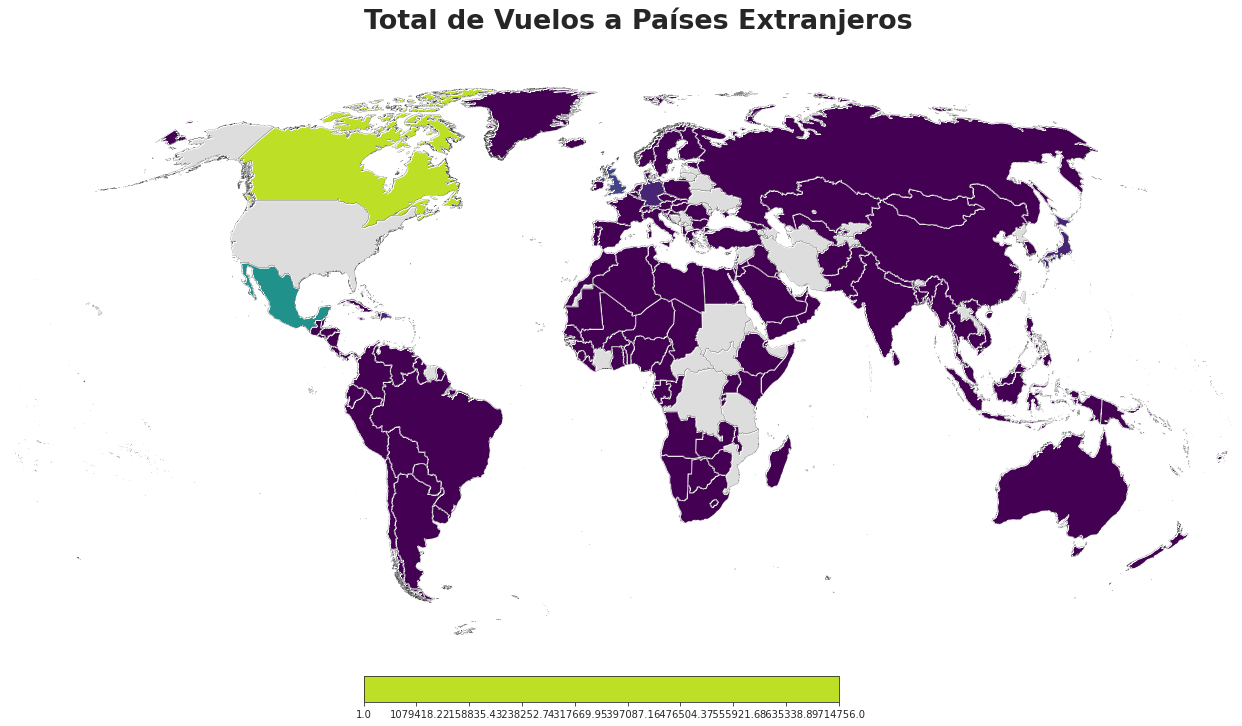

In [ ]:
#mpl.style.use('map')
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, facecolor='w', frame_on=False)
#fig.suptitle('Paises por vuelos', fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

shapefile = '/work/ne_10m_admin_0_countries/ne_10m_admin_0_countries'
m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)

for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in conteo_c.index:
        color = '#dddddd'
    else:
        color = scheme[conteo_c.loc[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.text(x=-8*(1), y=2.60*(10), s='Total de Vuelos a Países Extranjeros', fontsize=27, weight='bold')

plt.savefig("/work/Graph/M_Vuelos.pdf", dpi = 300, bbox_inches='tight')


In [ ]:
!pip install -U kaleido

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import plotly.graph_objects as go

conteo = airport_completo['usg_apt'].value_counts().to_frame()

conteo = conteo.reset_index()
conteo.columns = ['usg_apt','cont']

conteo = conteo.join(air_usa.set_index('usg_apt'), on='usg_apt')
conteo = conteo.sort_index(axis=0,ascending=False) 

limits = [(0,1),(2,10),(11, 50),(51, 500),(501,1000), (1001, 10000), (10001, 15000)]
colors = ['#472B79']
cities = []
scale = 70

fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'ISO-3',
        lon = conteo['long_usa'],
        lat = conteo['lat_usa'],
        text = conteo['usg_apt'],
        
        marker = dict(
            size = conteo['cont']/scale,
            colorscale = 'Viridis',
            cmin = 0,
            color = conteo['cont'],
            line_color='#472B79',
            line_width=0.5,
            sizemode = 'area', 
            colorbar_title= ""
        )))
        #name = '{0} - {1}'.format(lim[0],lim[1])))


fig.update_layout(
        #title_text = 'Aeropuertos con Mayor Catidad de Rutas Extranjeras',
        #showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = '#E7E7E7',
            bgcolor = '#FFFFFF',
            lakecolor = '#FFFFFF',
            countrycolor = '#CACACA',
            coastlinecolor = '#CACACA'
        )
    )

fig.write_image("/work/Graph/M_USA_Airport.pdf")
fig.show()


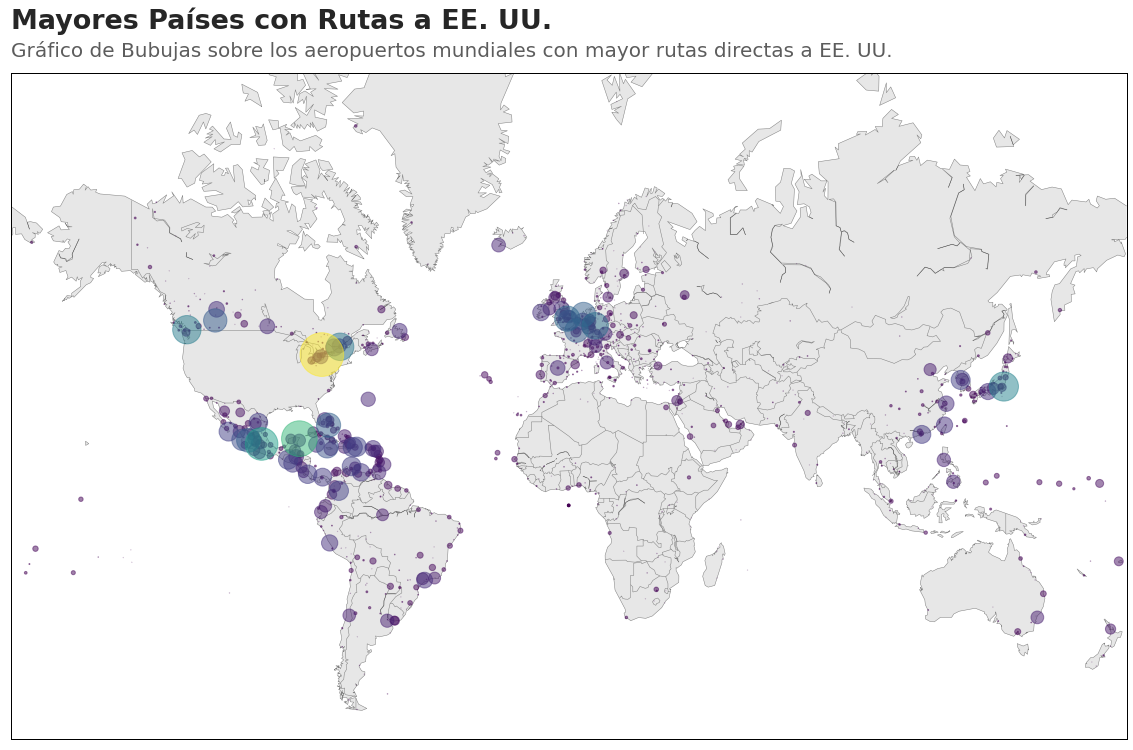

In [ ]:

conteo = airport_completo['fg_apt'].value_counts().to_frame()

conteo = conteo.reset_index()
conteo.columns = ['fg_apt','cont']

conteo = conteo.join(air.set_index('fg_apt'), on='fg_apt')
conteo = conteo.sort_index(axis=0,ascending=False)

fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(1,1,1)
 
# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    projection = 'merc',
    llcrnrlon=-180, llcrnrlat=-60,
    urcrnrlon=180,urcrnrlat=80   
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')
#m.drawstates(color='gray')

# Add a point per position

x, y = m(conteo['long'], conteo['lat'])

m.scatter(
    x, 
    y, 
    s= conteo['cont']/25, 
    alpha=0.5, 
    c=conteo['cont'],
    cmap="viridis", 
    zorder=10
)

plt.text(x=-8*(1), y=25.5*(1000000), s='Mayores Países con Rutas a EE. UU.', fontsize=27, weight='bold')

plt.text(x=-5*(1), y=24.5*(1000000), s='Gráfico de Bubujas sobre los aeropuertos mundiales con mayor rutas directas a EE. UU.', fontsize=20, alpha=0.75)

plt.savefig("/work/Graph/M_Air_Mund.pdf", dpi = 300, bbox_inches='tight')

In [ ]:
!pip install networkx==2.8

     |████████████████████████████████| 2.0 MB 30.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<ipython-input-40-ebdae20ac275>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



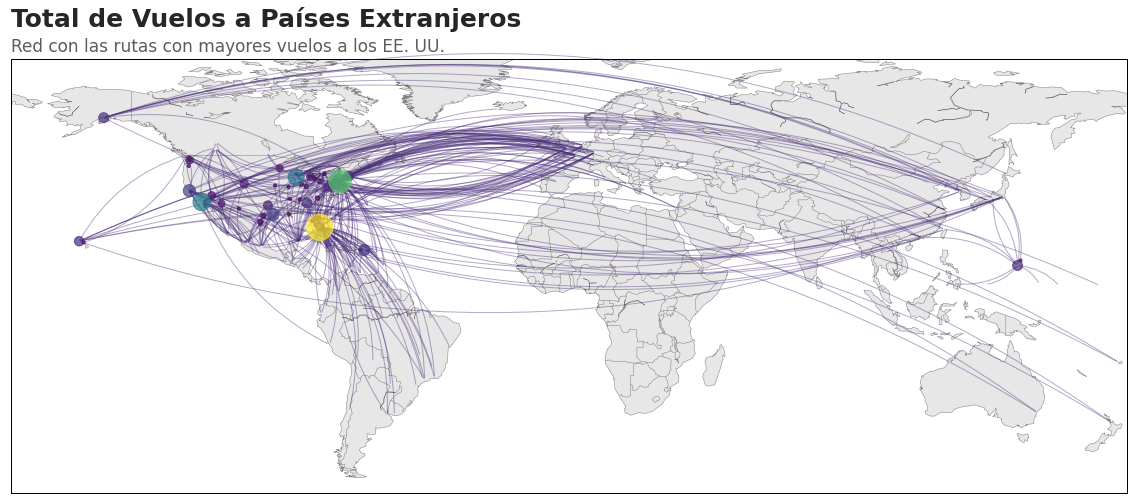

In [ ]:
import networkx as nx

rutas = airport_completo[['usg_apt', 'fg_apt', 'lat', 'long', 'lat_usa', 'long_usa']]
rutas['count'] = 1
rutas = rutas.groupby(['usg_apt', 'fg_apt', 'lat', 'long', 'lat_usa', 'long_usa']).count().reset_index()

rutas = rutas.sort_values(by=['count'], ascending=False)

prueba = rutas[:400]


fig = plt.figure(figsize=(20, 20))
#ax = fig.add_subplot(1,1,1)
 
# Establecemos la proyección del mapa base
m = Basemap(
    #ax = ax,
    resolution = 'c',
    #projection = 'merc',
    llcrnrlon=-180, llcrnrlat=-60,
    urcrnrlon=180,urcrnrlat=80   
)


#m.shadedrelief()

# Background color:
m.drawmapboundary(fill_color='#FFFFFF')

# Continent in green
m.fillcontinents(color='#E7E7E7',lake_color='#E7E7E7')

# Show the coast lines in black
m.drawcoastlines(color='gray', linewidth=0.5)
m.drawcountries(color='gray')

# La parte de Red X
# Poner las coordenadas de proyección del mapa en el diccionario "pos"
G=nx.Graph()

pos={}
for i in prueba.iterrows():
    G.add_edge(i[1][0], i[1][1])
    pos[i[1][0]]=(i[1][5],i[1][4])
    pos[i[1][1]]=(i[1][3],i[1][2])

ax=plt.gca()

for edge in G.edges():
    source, target = edge
    rad = 0.2
    arrowprops=dict(#lw=G.edges[(source,target)]['weight'],
                    arrowstyle="-",
                    color='#472B79',
                    connectionstyle=f"arc3,rad={rad}",
                    linestyle= '-',
                    alpha=0.4)
    ax.annotate("",
                xy=pos[source],
                xytext=pos[target],
                arrowprops=arrowprops
               )


# Definir características

conteo = prueba['usg_apt'].value_counts().to_frame()
conteo = conteo.reset_index()
conteo.columns = ['usg_apt','cont']

conteo = conteo.sort_index(axis=0,ascending=False)

conteop = prueba[['usg_apt', 'lat_usa', 'long_usa']]

conteo_usa = conteo.join(conteop.set_index('usg_apt'), on='usg_apt')
conteo_usa = conteo_usa.drop_duplicates()

x, y = m(conteo_usa['long_usa'], conteo_usa['lat_usa'])

m.scatter(
    x, 
    y, 
    s= conteo_usa['cont']*10, 
    alpha=0.7, 
    c=conteo_usa['cont'],
    cmap="viridis", 
    zorder=10
)

#plt.title('Cómo ir del Punto A al Punto B')

plt.text(x=-18*(10), y=90.5*(1), s='Total de Vuelos a Países Extranjeros', fontsize=25, weight='bold')

plt.text(x=-18*(10), y=82.5*(1), s='Red con las rutas con mayores vuelos a los EE. UU.', fontsize=17, alpha=0.75)

plt.savefig("/work/Graph/M_Red.pdf", dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
# Pasajeros de forma mensual:

pasajeros_hist = completo_pasajeros[['data_dte', 'Total']]

pasajeros_hist['data_dte'] = pd.to_datetime(pasajeros_hist['data_dte'])

pasajeros_hist = pasajeros_hist.groupby(by = ['data_dte']).sum().reset_index()

pasajeros_hist['month'] = pasajeros_hist.data_dte.dt.month
pasajeros_hist['day'] = pasajeros_hist.data_dte.dt.day
pasajeros_hist['year'] = pasajeros_hist.data_dte.dt.year

pasajeros_hist.set_index('data_dte', inplace = True)

<ipython-input-41-d7ef08e23129>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/pyth

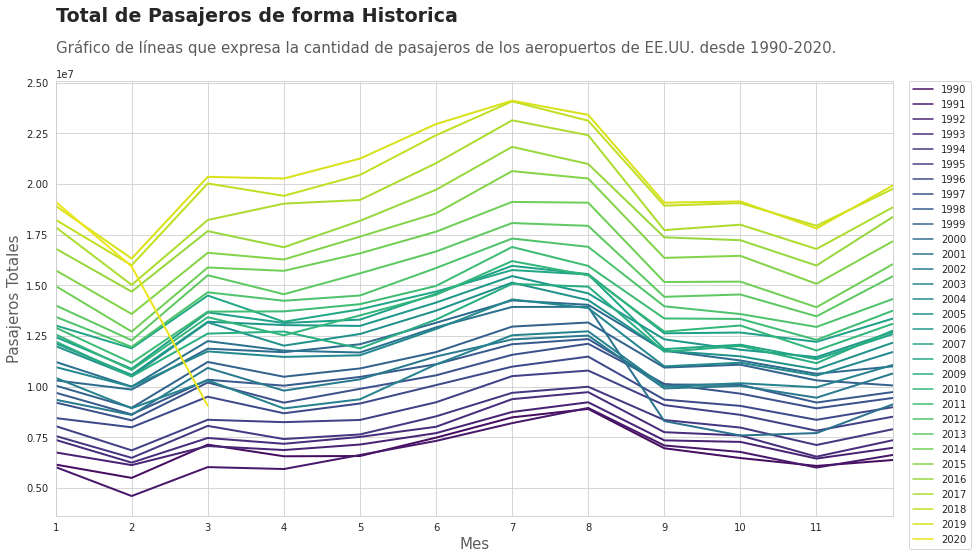

In [ ]:
import seaborn as sns
from pathlib import Path
from datetime import date
from pandas.tseries.offsets import MonthEnd

sns.set_style("whitegrid")
sns.color_palette("Set2")

# create color mapping based on all unique values of year
years = pasajeros_hist.index.year.unique()
colors = sns.color_palette('viridis', n_colors=len(years))  # get a number of colors
cmap = dict(zip(years, colors))  # zip values to colors
plt.figure(figsize=(16, 10))

for year in pasajeros_hist.index.year.unique():  # withing the month plot each year
        data = pasajeros_hist[pasajeros_hist.index.year == year]
        sns.lineplot(data.index.month, data.Total, err_style=None, hue=year, palette=cmap, lw=2)
plt.xlim(1, 12)
plt.xticks(range(1, 12))

plt.xlabel('Mes', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=1*(1), y=2.8*(10000000), s='Total de Pasajeros de forma Historica', fontsize=19, weight='bold')
plt.text(x=1*(1), y=2.65*(10000000), s='Gráfico de líneas que expresa la cantidad de pasajeros de los aeropuertos de EE.UU. desde 1990-2020.', fontsize=15, alpha=0.75)

figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)

plt.savefig("/work/Graph/P_H.pdf", dpi = 300, bbox_inches='tight')



plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/shared-libs/python3.9/py/lib/pyth

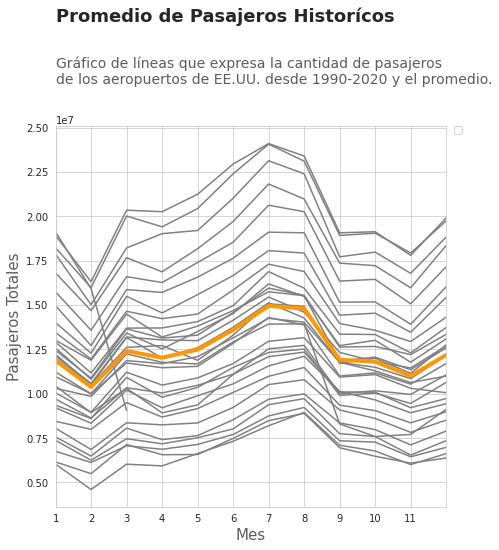

In [ ]:
# Pasajeros de forma mensual:

pasajeros_prom = pasajeros_hist.groupby(by = ['month']).mean().reset_index()

years = pasajeros_hist.index.year.unique()
colors = sns.color_palette('husl', n_colors=len(years))  # get a number of colors
cmap = dict(zip(years, colors))  # zip values to colors
plt.figure(figsize=(16, 10))

for year in pasajeros_hist.index.year.unique():  # withing the month plot each year
        data = pasajeros_hist[pasajeros_hist.index.year == year]
        sns.lineplot(data.index.month, data.Total, err_style=None, color = 'grey')

sns.lineplot(pasajeros_prom.month, pasajeros_prom.Total, err_style=None, color = '#FF9802', lw=4)

plt.xlim(1, 12)
plt.xticks(range(1, 12))
plt.xlabel('Mes', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=1*(1), y=3.1*(10000000), s='Promedio de Pasajeros Historícos', fontsize=18, weight='bold')
plt.text(x=1*(1), y=2.75*(10000000), s='Gráfico de líneas que expresa la cantidad de pasajeros\nde los aeropuertos de EE.UU. desde 1990-2020 y el promedio.', fontsize=14, alpha=0.75)

figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(7, 7)

plt.savefig("/work/Graph/P_H_P.pdf", dpi = 300, bbox_inches='tight')

plt.show()


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


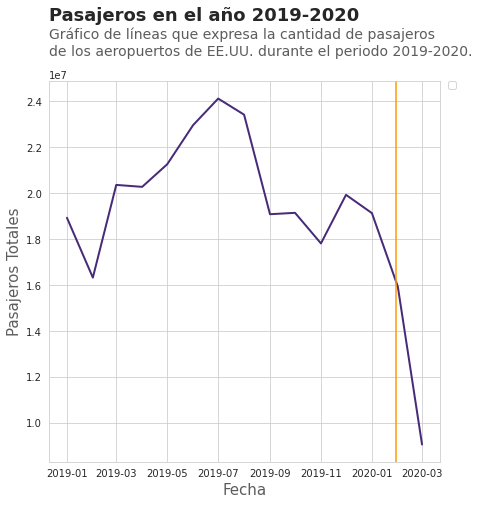

In [ ]:
# Pandemia Covid-19

covid = pasajeros_hist[(pasajeros_hist['year'] == 2019) | (pasajeros_hist['year'] == 2020)]

covid = covid.reset_index()

plt.figure(figsize=(16, 10))
sns.lineplot(covid.data_dte, covid.Total, err_style=None, color = '#472B79', lw=2)
plt.axvline(pd.Timestamp('2020-01-30 00:00:00'), color='#FF9802')

plt.xlabel('Fecha', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=pd.Timestamp('2018-12-10 00:00:00'), y=2.75*(10000000), s='Pasajeros en el año 2019-2020', fontsize=18, weight='bold')
plt.text(x=pd.Timestamp('2018-12-10 00:00:00'), y=2.6*(10000000), s='Gráfico de líneas que expresa la cantidad de pasajeros\nde los aeropuertos de EE.UU. durante el periodo 2019-2020.', fontsize=14, alpha=0.75)

figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(7, 7)

plt.savefig("/work/Graph/P_Covid.pdf", dpi = 300, bbox_inches='tight')



/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


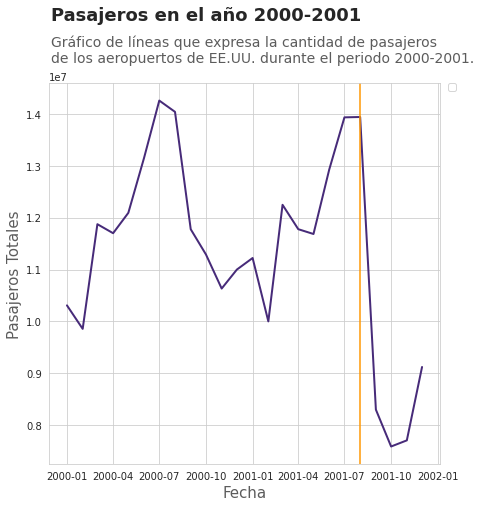

In [ ]:
# Atentado 9-11

atentado = pasajeros_hist[(pasajeros_hist['year'] == 2000) | (pasajeros_hist['year'] == 2001)]

atentado = atentado.reset_index()

plt.figure(figsize=(16, 10))
sns.lineplot(atentado.data_dte, atentado.Total, err_style=None, color = '#472B79', lw=2)
plt.axvline(pd.Timestamp('2001-08-01 00:00:00'), color='#FF9802')

plt.xlabel('Fecha', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=pd.Timestamp('1999-12-01 00:00:00'), y=1.58*(10000000), s='Pasajeros en el año 2000-2001', fontsize=18, weight='bold')
plt.text(x=pd.Timestamp('1999-12-01 00:00:00'), y=1.5*(10000000), s='Gráfico de líneas que expresa la cantidad de pasajeros\nde los aeropuertos de EE.UU. durante el periodo 2000-2001.', fontsize=14, alpha=0.75)

figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(7, 7)

plt.savefig("/work/Graph/P_911.pdf", dpi = 300, bbox_inches='tight')

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


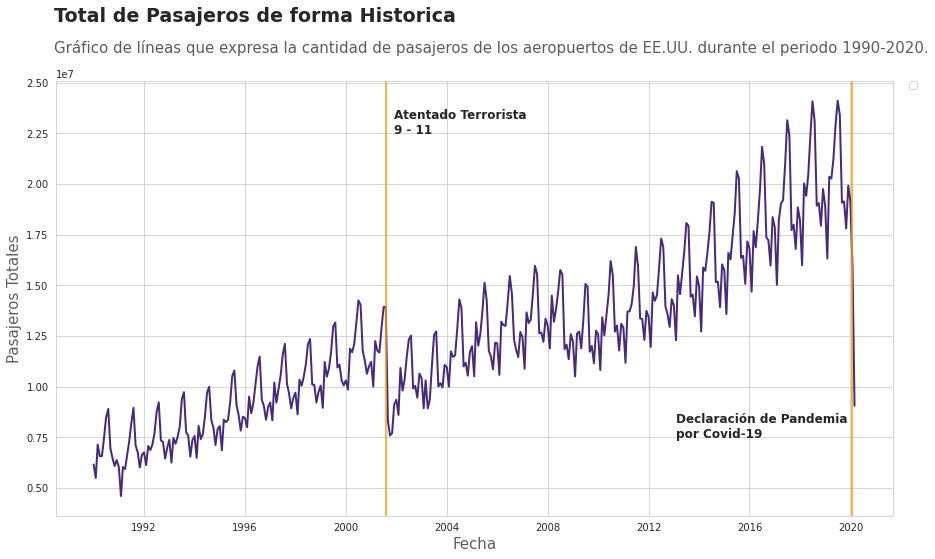

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(pasajeros_hist.index, pasajeros_hist.Total, err_style=None, color = '#472B79', lw=2)
plt.axvline(pd.Timestamp('2001-08-01 00:00:00'), color='#FF9802')
plt.axvline(pd.Timestamp('2020-01-30 00:00:00'), color='#FF9802')

plt.xlabel('Fecha', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=pd.Timestamp('1988-06-01 00:00:00'), y=2.8*(10000000), s='Total de Pasajeros de forma Historica', fontsize=19, weight='bold')
plt.text(x=pd.Timestamp('1988-06-01 00:00:00'), y=2.65*(10000000), s='Gráfico de líneas que expresa la cantidad de pasajeros de los aeropuertos de EE.UU. durante el periodo 1990-2020.', fontsize=15, alpha=0.75)


plt.text(x=pd.Timestamp('2001-12-01 00:00:00'), y=2.25*(10000000), s='Atentado Terrorista\n9 - 11', fontsize=12, weight='bold')
plt.text(x=pd.Timestamp('2013-01-30 00:00:00'), y=0.75*(10000000), s='Declaración de Pandemia\npor Covid-19', fontsize=12, weight='bold')


figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)

plt.savefig("/work/Graph/P_H_L.pdf", dpi = 300, bbox_inches='tight')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e8a7e86-c34c-4414-848f-f37c1da7518e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>